--------------------------------------


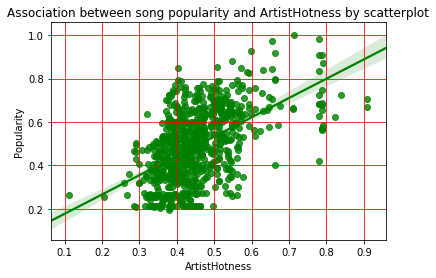

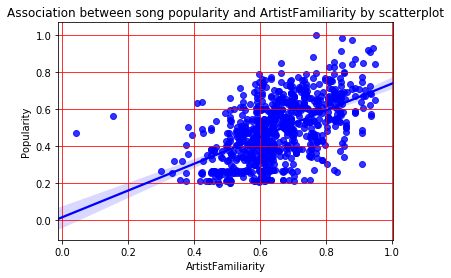

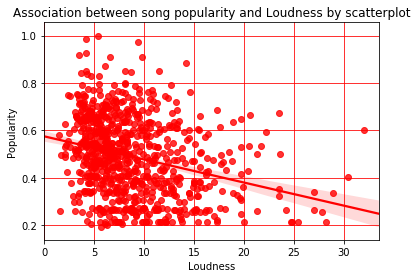

In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
import seaborn as sns


spark = SparkSession.builder.appName('MSD').getOrCreate()

df = spark.read.format("parquet").options(inferSchema=True).load("hdfs:/user/yxl13-kkr16/CleanedSongDataset1.parquet")

df = df.select('Popularity', 'Loudness', 'ArtistHotness', 'ArtistFamiliarity', 'Year').filter(df['Year'] > 1990)

pandas_df = df.toPandas()

print("--------------------------------------")

fig1 = plt.figure().add_subplot(111)
fig1 = sns.regplot(x="ArtistHotness", y="Popularity", data=pandas_df, color="g")
fig1.grid(True, color="r")
fig1.title.set_text(r'Association between song popularity and ArtistHotness by scatterplot')

fig2 = plt.figure().add_subplot(111)
fig2 = sns.regplot(x="ArtistFamiliarity", y="Popularity", data=pandas_df, color="b")
fig2.grid(True, color="r")
fig2.title.set_text(r'Association between song popularity and ArtistFamiliarity by scatterplot')

fig3 = plt.figure().add_subplot(111)
fig3 = sns.regplot(x="Loudness", y="Popularity", data=pandas_df, color="r")
fig3.grid(True, color="r")
fig3.title.set_text(r'Association between song popularity and Loudness by scatterplot')

plt.show()